In [2]:
from scripts.ising_simulation import IsingSimulation
import numpy as np
from joblib import Parallel, delayed
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

In [3]:

def calc_susceptibility(beta, J, n_rois, eq_steps=300, mc_steps=200):
    sim = IsingSimulation(n_rois, beta, coupling_mat = True, J=J)
    energy_eq = []
    mag_eq = []
    for i in range(eq_steps):
        sim.step()
        energy_eq.append(sim.calcEnergy())
        mag_eq.append(sim.calcMag())
    mag = []
    mag_squared = []
    energy = []
    energy_squared = []
    chi = []
    states = []
    for i in range(mc_steps):
        s = sim.step()
        states.append(s)
        mag.append(sim.calcMag())
        energy.append(sim.calcEnergy())
        mag_squared.append(mag[-1]**2)
        energy_squared.append(energy[-1]**2)
        c = (np.mean(mag_squared) - np.mean(mag)**2) *beta / (n_rois * n_rois) 
        chi.append(c)
    return chi, mag, energy, energy_eq, mag_eq, states
    # return chi

In [3]:
ising_reps = np.load('../data/AAL_reps/ising_NYU.npy')
fc_rep_ut = np.load('../data/AAL_reps/sfc_NYU.npy')
diag = np.load('../data/AAL_reps/diag_NYU.npy')
betas = np.load('../data/AAL_reps/betas_NYU.npy')
n_rois = ising_reps.shape[1]
fc_reps = np.zeros((fc_rep_ut.shape[0], n_rois, n_rois))
for i in range(fc_rep_ut.shape[0]):
    fc_reps[i][np.triu_indices(n_rois)] = fc_rep_ut[i]
    fc_reps[i] = np.triu(fc_reps[i]) + np.tril(fc_reps[i].T, k=-1)

<AxesSubplot:>

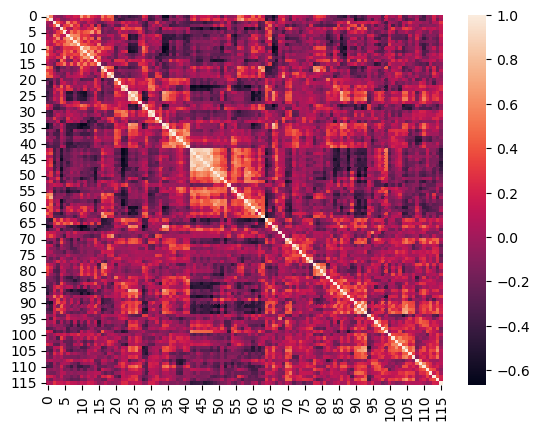

In [5]:
sns.heatmap(fc_reps[0])

In [5]:
eq_steps, mc_steps = 1000, 2000

In [6]:

chi, mag, energy, energy_eq, mag_eq = calc_susceptibility(0.02, ising_reps[0], n_rois, eq_steps=eq_steps, mc_steps=mc_steps)


ValueError: too many values to unpack (expected 5)

In [24]:
# plt.plot(range(mc_steps), mag, label='mag')
# plt.plot(range(mc_steps), energy, label='energy')
# mag_avg = np.convolve(mag, np.ones(mc_steps)/mc_steps, mode='same')
# print(mag_avg)
# plt.plot(range(mc_steps), mag_avg, label='mag_avg')
eq_steps = 0
mc_steps = 10000
beta_range = np.arange(0.01, 0.25, 0.01)
res = Parallel(n_jobs=6)(delayed(calc_susceptibility)(beta, ising_reps[0], n_rois, eq_steps=eq_steps, mc_steps=mc_steps) for beta in beta_range)
# for beta in beta_range:
#     beta = round(beta, 5)
#     chi, mag, energy, energy_eq, mag_eq = calc_susceptibility(beta, ising_reps[0], n_rois, eq_steps=eq_steps, mc_steps=mc_steps)


In [12]:
len(res[0])

6

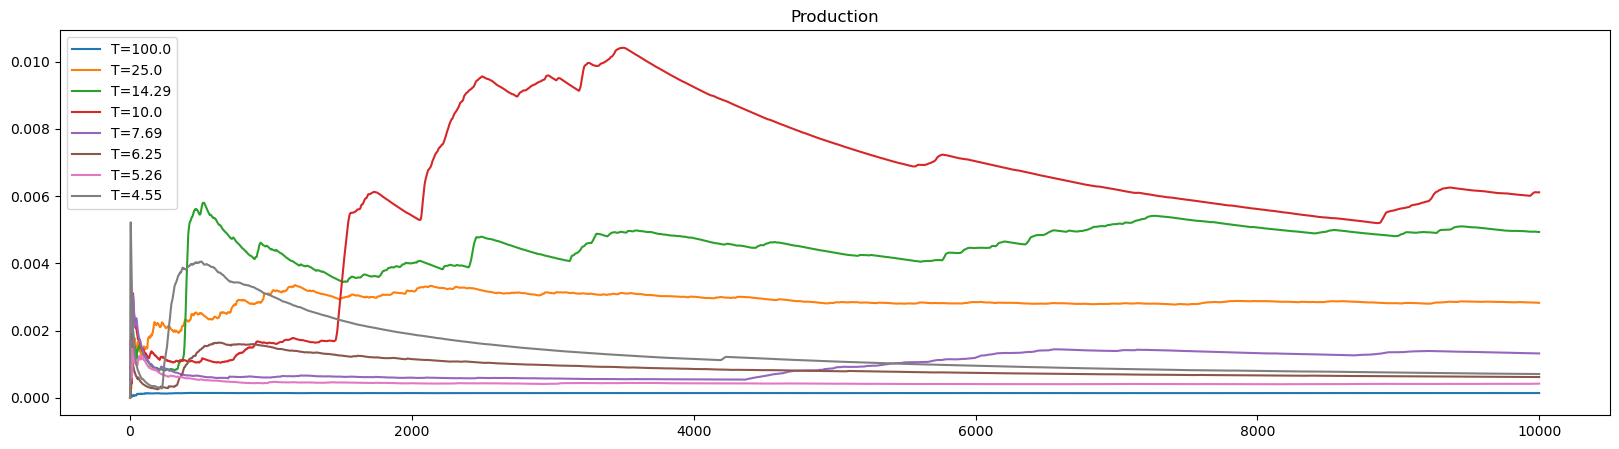

In [25]:
for idx, (chi, mag, energy, energy_eq, mag_eq, states) in enumerate(res):
    if idx%3 == 0:
        plt.plot(range(mc_steps), chi, label='T={}'.format(round(1/beta_range[idx], 2)))
plt.legend()
plt.title('Production')
#increase figure size 
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()


24
24


Text(0, 0.5, 'Susceptibility')

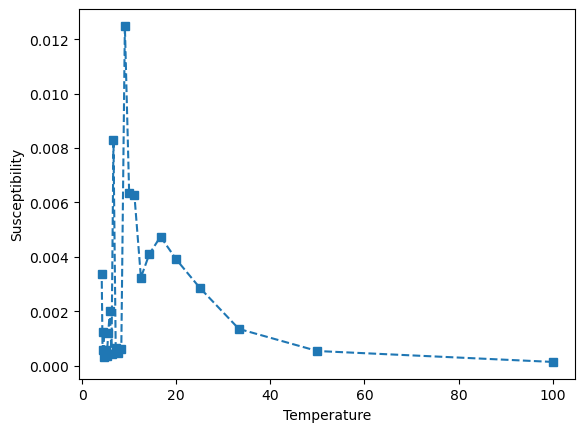

In [10]:
chis = []
for chi, mag, energy, energy_eq, mag_eq, states in res:
    chis.append(chi[-1])
# print(len(chis))
# print(len(beta_range))
plt.plot(1/beta_range, chis,  linestyle='dashed', marker='s')
plt.xlabel("Temperature")
plt.ylabel("Susceptibility")

In [21]:
beta = 0.00001
chi, mag, energy, energy_eq, mag_eq, states = calc_susceptibility(beta, ising_reps[0], n_rois, eq_steps=eq_steps, mc_steps=mc_steps)

In [19]:
pickle.dump(res, open('../data/AAL_reps/ising_susceptibility_NYU.pkl', 'wb'))

In [21]:
chi, mag, energy, _, _, states = res[2]

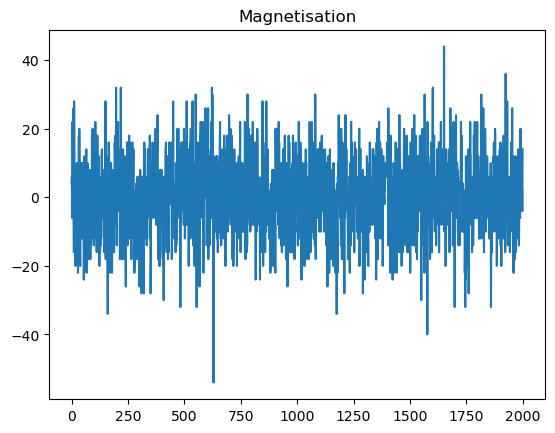

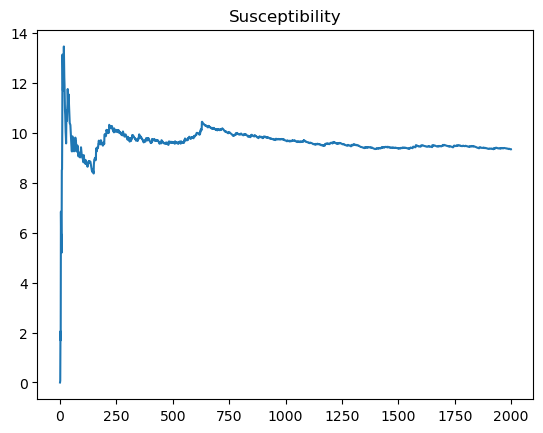

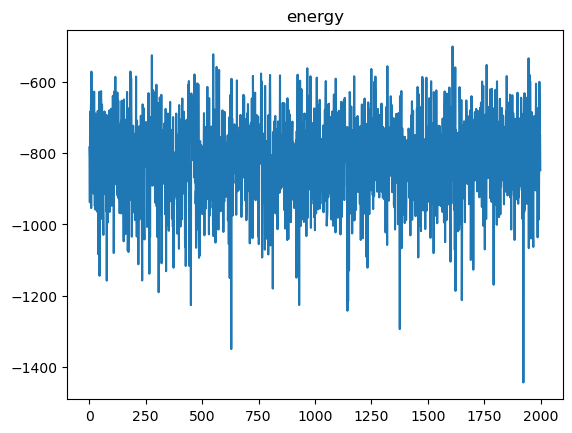

In [16]:
plt.plot(range(len(mag)), mag, label='energy')
plt.title('Magnetisation')
plt.show()

plt.plot(range(len(chi)), chi, label='chi')
plt.title('Susceptibility')
plt.show()


plt.plot(range(len(energy)), energy, label='chi')
plt.title('energy')
plt.show()

(2000, 116)


<AxesSubplot:>

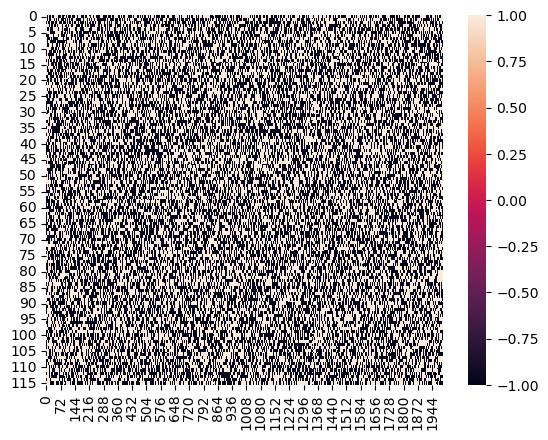

In [22]:
states = np.array(states)
# states = states[::n_rois]
print(states.shape)
sns.heatmap(states.T)

In [4]:
fc_reps.shape, ising_reps.shape

((170, 116, 116), (170, 116, 116))

In [5]:
betas

array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.04,
       0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.04, 0.03, 0.03, 0.03, 0.04, 0.03, 0.04, 0.03, 0.04, 0.04,
       0.04, 0.03, 0.03, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.04, 0.03, 0.03, 0.03,
       0.04, 0.03, 0.04, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.04, 0.03, 0.03, 0.01,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03,
       0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.

In [6]:
fc_pos = fc_reps[diag == 1]
fc_neg = fc_reps[diag == 0]
ising_pos = ising_reps[diag == 1]
ising_neg = ising_reps[diag == 0]

In [7]:
ising_pos.shape, fc_pos.shape

((97, 116, 116), (97, 116, 116))

In [8]:
beta_range = np.arange(0.2, 3.05, 0.05)
beta_range = np.arange(0.01, 0.1, 0.005)
chi_pos = []
for beta in beta_range:
    chi_pos.append(Parallel(n_jobs=6)(delayed(calc_susceptibility)(beta, J, n_rois) for J in ising_pos))

KeyboardInterrupt: 

In [83]:
chi_neg = []
for beta in beta_range:
    chi_neg.append(Parallel(n_jobs=6)(delayed(calc_susceptibility)(beta, J, n_rois) for J in ising_neg))

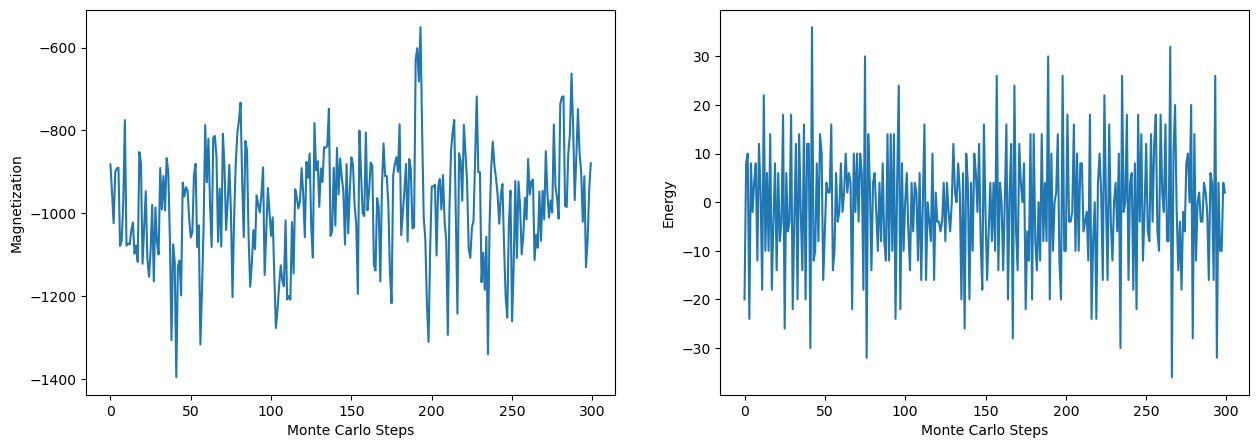

In [41]:
# plot magnetization and energy with proper labels
def plot_mag_energy(mag, energy):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(mag)
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Magnetization')
    plt.subplot(1, 2, 2)
    plt.plot(energy)
    plt.xlabel('Monte Carlo Steps')
    plt.ylabel('Energy')
    plt.show()
    return
plot_mag_energy(mag_eq, energy_eq)

In [46]:
chi_pos = np.array(chi_pos)
chi_neg = np.array(chi_neg)

/tmp/ipykernel_650/968328201.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  chi_pos = np.array(chi_pos)


In [51]:
chi_pos_bak = chi_pos

In [52]:
chi_pos = chi_pos[:, :, 0]

In [53]:
chi_pos_mean = np.mean(chi_pos, axis=1)
chi_neg_mean = np.mean(chi_neg, axis=1)

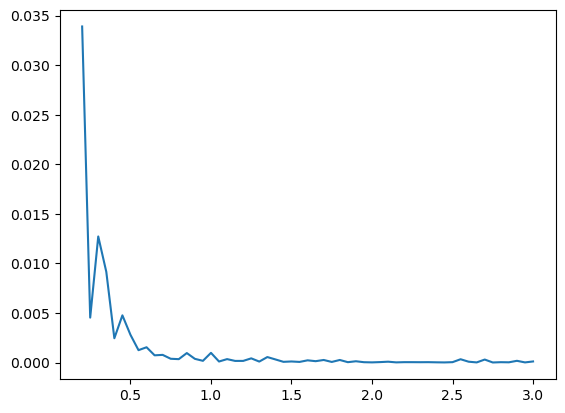

In [54]:
plt.plot(beta_range, chi_pos_mean)

In [55]:
chi_pos_mean

array([0.033902847156674014, 0.004531964279147307, 0.012716951724546547,
       0.009151614644533896, 0.002450534081297455, 0.004761820120867407,
       0.0027992306348603065, 0.0012488081533676512,
       0.0015416434268645984, 0.0007288934663899409,
       0.0007731371018441804, 0.0003806962542546723,
       0.00034224413744070065, 0.0009557215521387598,
       0.00037398655734936244, 0.0001726275078824472,
       0.0009768928435711043, 0.0001037836294894094,
       0.0003456093350732815, 0.0001635604611487379,
       0.00016520485757832613, 0.00042266318937935756,
       9.712649964498257e-05, 0.0005532420744045996,
       0.00031398085332175077, 7.149538853285685e-05,
       0.00010780295508129401, 6.300187592406801e-05,
       0.00022306537266937815, 0.00013751801142701327,
       0.00025852014408617375, 6.094793875724582e-05,
       0.0002585135141577219, 3.6686115488963655e-05,
       0.0001294985348037331, 3.428155654733006e-05,
       1.6795558184290236e-05, 4.4652373920552763

# J distributions

In [4]:
J = ising_reps[:, np.triu_indices(116)[0], np.triu_indices(116)[1]].reshape(170, -1)

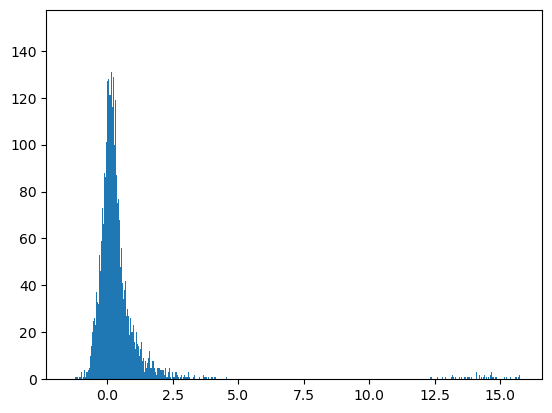

In [11]:
J_mean = np.mean(J, axis=0)
plt.hist(J_mean, bins=1000)
plt.show()

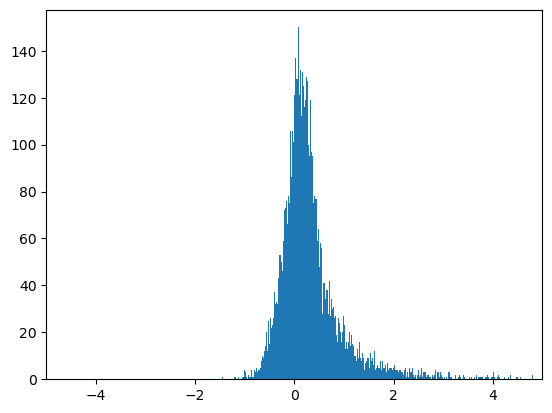

In [10]:
plt.hist(J_mean, bins=1000)
plt.xlim(-5, 5)
plt.show()